In [1]:
import os

from ml.eval import eval_model
from ml.models.MySimpleCNN_Feit import MySimpleCNNInceptionModuleV2Small

print(os.getcwd())
os.chdir('/home/jelinek/recetox/')

from ml.pipeline import FeitDataPipeline
from cfg import *


name = "MySimpleCNN-inception-v2-small"

2022-03-08 17:59:33.465012: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


/home/jelinek/recetox/src/notebooks/model_heaven


2022-03-08 17:59:34.955065: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-03-08 17:59:34.955084: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-03-08 17:59:34.955927: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-08 17:59:34.999006: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1611] Profiler found 1 GPUs
2022-03-08 17:59:34.999323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2022-03-08 17:59:34.999941: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcupti.so
2022-03-08 17:59:35.003202: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-03-08 17:59:35.003352: I tensorflow/c

In [3]:
pipeline = MySimpleCNNInceptionModuleV2Small(train_data_dir='data/Feit_colon-annotation-tiles-256/data_train/',
                                      valid_data_dir='data/Feit_colon-annotation-tiles-256/data_valid/')

Model: "MySimpleCnnFewerLayers"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 256, 256, 8)  32          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 256, 256, 8)  32          input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_20 (MaxPooling2D) (None, 256, 256, 3)  0           input_3[0][0]                    
_____________________________________________________________________________

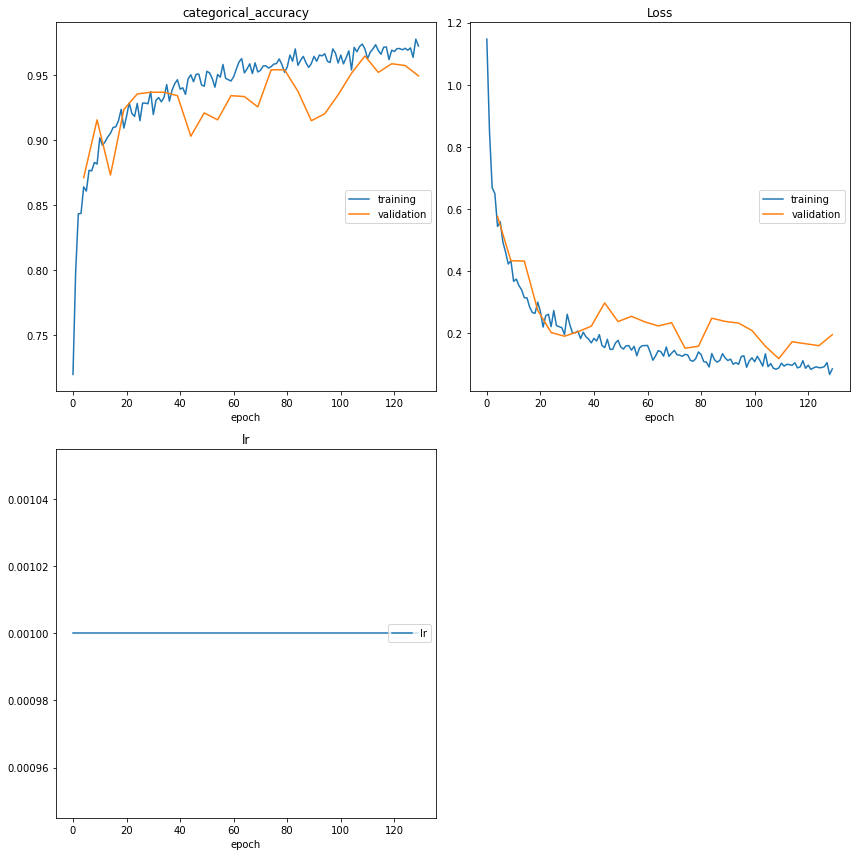

categorical_accuracy
	training         	 (min:    0.720, max:    0.978, cur:    0.973)
	validation       	 (min:    0.871, max:    0.965, cur:    0.950)
Loss
	training         	 (min:    0.067, max:    1.147, cur:    0.085)
	validation       	 (min:    0.118, max:    0.576, cur:    0.195)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)


In [3]:
pipeline.execute_pipeline(perform_validation=False, perform_test_segmentation=False)

In [4]:
pipeline.save_pipeline()

In [5]:
eval_model(pipeline.model,
           pipeline.get_data_loader_validation(),
           print_confusion_matrix=True,
           save_misclassified=False)

Found 1505 images belonging to 12 classes.
95/95 [==============================] - 5s 50ms/step - loss: 0.1949 - categorical_accuracy: 0.9495
Measuring time


2022-02-28 10:18:53.582973: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.


2022-02-28 10:18:55.631550: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.


2022-02-28 10:18:57.689048: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 390856704 exceeds 10% of free system memory.


2022-02-28 10:18:59.789667: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.


2022-02-28 10:19:01.516029: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.


--Iteration 10/10
Batch size: 16
Mean time per tile 0.5364ms
Confusion Matrix
[[315   0   0   0   2   0   2   0   0   0  16   0]
 [  3  38  11   0   2   0   5   0   0   0   3   2]
 [  0   2 133   0   4   0   3   0   0   0   3   0]
 [  0   0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0   1 543   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0  76   0   0   0   0   0]
 [  0   0   3   0   0   0   2  80   0   0   1   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0 230   0]
 [  0   0   0   0   0   0   0   0   0   0   5   1]]
Classification Report
                             precision    recall  f1-score   support

             adenocarcinoma       0.98      0.94      0.96       335
          blood_and_vessels       0.93      0.59      0.72        64
          connective_tissue       0.90      0.92      0.91       145
          

In [6]:
pipeline = FeitDataPipeline.load_pipeline(pipeline_name=name)

In [ ]:
from ml.eval import evaluate_segmentation_on_feit_annotation

evaluation_path = Path('data/Feit_colon-annotation_valid/')

segmentation_dir = Path('segmentations') / pipeline.params.name

evaluate_segmentation_on_feit_annotation(evaluation_path, pipeline.build_segmenter(),
                                         32, pipeline.params.class_names,
                                         save_segmentations=True, segmentations_dir=segmentation_dir,
                                         neighbourhood_size=1)